# <font color='blue'>Data Science Academy</font>

# <font color='blue'>Introdução à Inteligência Artificial</font>

## Perceptron

In [1]:
from IPython.display import Image
Image(url = 'Perceptron01.png')

https://github.com/rasbt/mlxtend

In [2]:
# Mlxtend (machine learning extensions)
!pip install mlxtend

     |████████████████████████████████| 1.3MB 1.9MB/s eta 0:00:01


In [3]:
# Módulos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from time import time
%matplotlib inline

In [4]:
# Algoritmo Perceptron
# eta = taxa de aprendizagem (learning rate) - valores entre 0 e 1
# epoch = número de passos no dataset de treino

class Perceptron(object):

    def __init__(self, eta = 0.01, epochs = 50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [5]:
# Dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)

In [6]:
# Obtendo dados de duas classes: Setosa e versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0,2]].values

In [7]:
# Criando o modelo
clf_perceptron = Perceptron(epochs = 10, eta = 0.1)

In [8]:
# Treinamento
clf_perceptron.train(X, y)

Como podemos ver, o perceptron converge após a 6ª iteração e separa as duas classes de flores perfeitamente.

Pesos (Weights): [-0.4  -0.68  1.82]


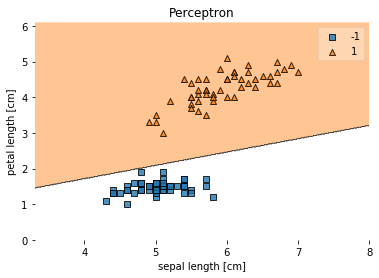

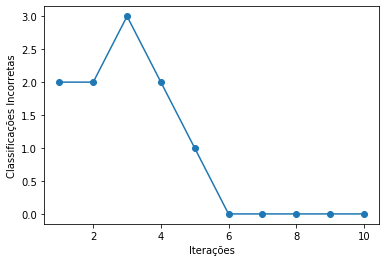

In [9]:
# Plot
print('Pesos (Weights): %s' % clf_perceptron.w_)
plot_decision_regions(X, y, clf = clf_perceptron)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

plt.plot(range(1, len(clf_perceptron.errors_)+1), clf_perceptron.errors_, marker = 'o')
plt.xlabel('Iterações')
plt.ylabel('Classificações Incorretas')
plt.show()

## Problemas com o Perceptron

Embora o perceptron tenha classificado perfeitamente as duas classes de flores do dataset Iris, a convergência é um dos maiores problemas do perceptron. Frank Rosenblatt comprovou matematicamente que a regra de aprendizado do perceptron converge se as duas classes podem ser separadas por um hiperplano linear, mas surgem problemas se as classes não podem ser perfeitamente separadas por um hiperplano linear. Para demonstrar esse problema, usaremos duas classes e atributos diferentes do conjunto de dados Iris.

In [10]:
from IPython.display import Image
Image(url = 'Perceptron02.png')

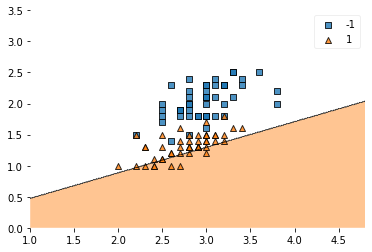

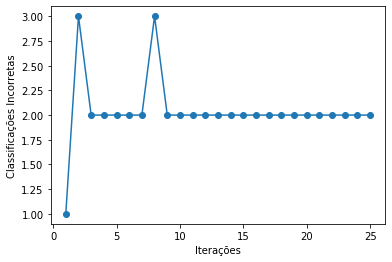

In [11]:
# Versicolor e virginica
y2 = df.iloc[50:150, 4].values
y2 = np.where(y2 == 'Iris-virginica', -1, 1)
X2 = df.iloc[50:150, [1,3]].values

clf = Perceptron(epochs = 25, eta = 0.01)
clf.train(X2, y2)

plot_decision_regions(X2, y2, clf = clf)
plt.show()

plt.plot(range(1, len(clf.errors_)+1), clf.errors_, marker = 'o')
plt.xlabel('Iterações')
plt.ylabel('Classificações Incorretas')
plt.show()

Mesmo com uma menor taxa de treinamento, o perceptron não conseguiu encontrar um bom limite de decisão uma vez que uma ou mais amostras serão sempre mal classificadas em cada época (cada passada), de modo que a regra de aprendizagem nunca para de atualizar os pesos.

Outra falha do algoritmo perceptron é que ele para de atualizar os pesos assim que todas as amostras são classificadas corretamente. Nossa intuição nos diz que um limite de decisão com uma grande margem entre as classes provavelmente tem um erro de generalização melhor do que o limite de decisão do perceptron. Os classificadores de grande margem, como as Máquinas de Suporte Vector (SVM), resolveriam este problema.

In [12]:
print('Número Total de Classificações Incorretas: %d of 100' % (y2 != clf.predict(X2)).sum())

Número Total de Classificações Incorretas: 43 of 100


### Fim